In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2761 entries, 2012-01-03 to 2022-12-20
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   2761 non-null   float64
 1   (High, GOOG)    2761 non-null   float64
 2   (Low, GOOG)     2761 non-null   float64
 3   (Open, GOOG)    2761 non-null   float64
 4   (Volume, GOOG)  2761 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 129.4 KB


In [8]:
data.reset_index(inplace = True)

In [9]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354963,16.478058,16.285971,16.432394,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.968758,96.871923,93.603668,95.197938,26452900
2757,2022-12-15,90.873482,93.693352,90.106242,93.205108,28298800
2758,2022-12-16,90.534698,91.421511,89.687743,90.873478,48485500


In [24]:
ma_days_100 = data.Close.rolling(100).mean()
ma_days_100.tail(5)

Ticker,GOOG
2756,103.243736
2757,103.101846
2758,102.875260
2759,102.621770
2760,102.352638


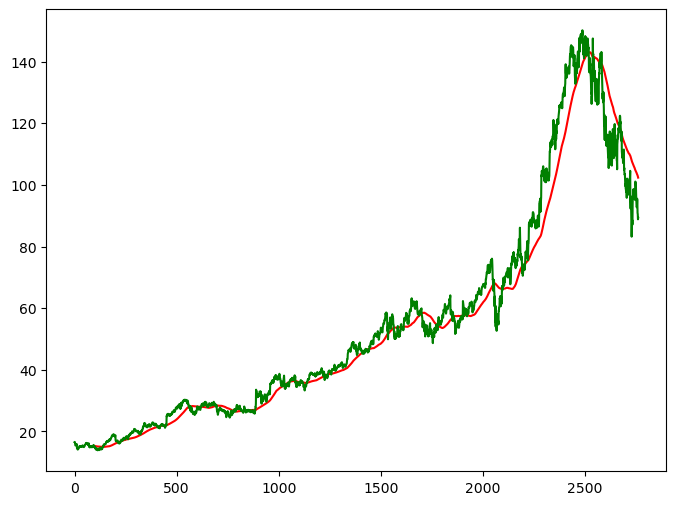

In [27]:
plt.figure(figsize=(8,6))
plt.plot(ma_days_100,'r')
plt.plot(data.Close, 'g')
plt.show()

In [28]:
ma_days_200 = data.Close.rolling(200).mean()
ma_days_200.tail()

Ticker,GOOG
2756,112.009502
2757,111.792524
2758,111.576062
2759,111.361971
2760,111.178458


<function matplotlib.pyplot.show(close=None, block=None)>

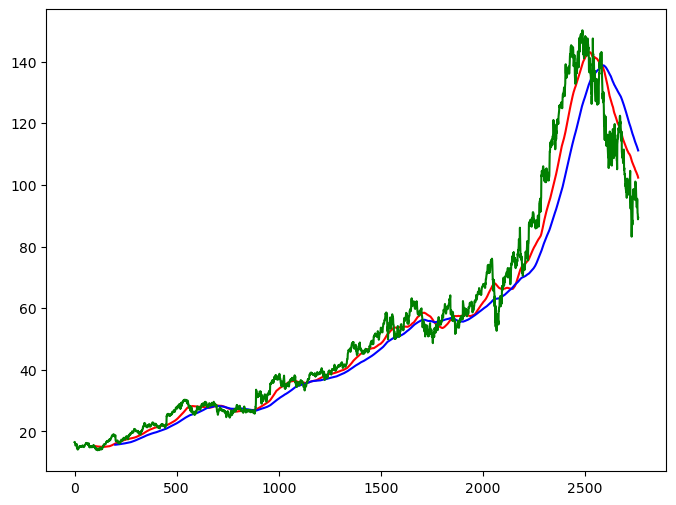

In [29]:
plt.figure(figsize=(8,6))
plt.plot(ma_days_100, 'r')
plt.plot(ma_days_200, 'b')
plt.plot(data.Close, 'g')
plt.show

In [30]:
data.dropna(inplace=True)

In [32]:
data.isnull().sum()

Price   Ticker
Date              0
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [35]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [36]:
data_train.shape

(2208, 1)

In [37]:
data_test.shape

(553, 1)